In [1]:
#omsairam omsairam omsairam 

[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 

In [3]:
#import some libraries
import matplotlib.pyplot as plt, pandas as pd, numpy as np, matplotlib as mpl
from __future__ import print_function
import matplotlib.animation as animation
#mpl.rcParams['font.family'] = ['Bitstream Vera Sans']
from IPython.display import HTML
import cv2
import json #import json library

In [4]:
def get_data(file):
    with open(file) as json_file:
        data = json.load(json_file)

    return data

In [5]:
d = get_data('0021500662.json')

In [6]:
data = d.copy()

In [7]:
len(d["events"][132]["moments"])

713

In [8]:
data["events"] = [d["events"][132]]

In [9]:
data["events"][0]["moments"] = data["events"][0]["moments"][230:378]

In [10]:
# Animation function / loop
def draw_court(axis):
    import matplotlib.image as mpimg
    img = mpimg.imread('./nba_court_T.png') #read image. I got this image from gmf05's github.
    plt.imshow(img,extent=axis, zorder=0) #show the image. 

def animate(n): #matplotlib's animation function loops through a function n times that draws a different frame on each iteration
    for i,ii in enumerate(player_xy[n]): #loop through all the players
        player_circ[i].center = (ii[1], ii[2]) #change each players xy position
        player_text[i].set_text(str(jerseydict[ii[0]])) #draw the text for each player. 
        player_text[i].set_x(ii[1]) #set the text x position
        player_text[i].set_y(ii[2]) #set text y position
        print(player_xy[n])
    ball_circ.center = (ball_xy[n,0],ball_xy[n,1]) #change ball xy position
    ball_circ.radius = 1.1 #i could change the size of the ball according to its height, but chose to keep this constant
    return tuple(player_text) + tuple(player_circ) + (ball_circ,)

def init(): #this is what matplotlib's animation will create before drawing the first frame. 
    for i in range(10): #set up players
        player_text[i].set_text('')
        ax.add_patch(player_circ[i])
    ax.add_patch(ball_circ) #create ball
    ax.axis('off') #turn off axis
    dx = 5
    plt.xlim([0-dx,100+dx]) #set axis
    plt.ylim([0-dx,50+dx])  
    return tuple(player_text) + tuple(player_circ) + (ball_circ,)

In [11]:
player_fields = data['events'][0]['home']['players'][0].keys()
home_players = pd.DataFrame(data=[i for i in data['events'][0]['home']['players']], columns=player_fields)
away_players = pd.DataFrame(data=[i for i in data['events'][0]['visitor']['players']], columns=player_fields)
players = pd.merge(home_players, away_players, how='outer')
jerseydict = dict(zip(players.playerid.values, players.jersey.values))

In [12]:
#the order of events does not match up, so we have to use the eventIds. This loop finds the correct event for a given id#.
search_id = 156
def find_moment(search_id):
    for i,events in enumerate(data['events']):
        if events['eventId'] == str(search_id):
            finder = i
            break
    return finder

event_num = find_moment(search_id) 
ball_xy = np.array([x[5][0][2:5] for x in data['events'][event_num]['moments']], dtype = object) #create matrix of ball data
player_xy = np.array([np.array(x[5][1:])[:,1:4] for x in data['events'][event_num]['moments']], dtype = object) #create matrix of player data



[[201945.0 14.10222 45.6015]
 [202334.0 7.73374 33.6576]
 [203468.0 22.90422 4.94513]
 [203459.0 31.40754 28.64996]
 [203086.0 9.57546 14.90985]
 [101138.0 7.33936 24.38897]
 [101150.0 24.37879 25.5557]
 [203527.0 21.19926 9.73687]
 [1626148.0 9.0236 36.83745]
 [1626156.0 10.59748 13.19214]]
[[201945.0 14.10222 45.6015]
 [202334.0 7.73374 33.6576]
 [203468.0 22.90422 4.94513]
 [203459.0 31.40754 28.64996]
 [203086.0 9.57546 14.90985]
 [101138.0 7.33936 24.38897]
 [101150.0 24.37879 25.5557]
 [203527.0 21.19926 9.73687]
 [1626148.0 9.0236 36.83745]
 [1626156.0 10.59748 13.19214]]
[[201945.0 14.10222 45.6015]
 [202334.0 7.73374 33.6576]
 [203468.0 22.90422 4.94513]
 [203459.0 31.40754 28.64996]
 [203086.0 9.57546 14.90985]
 [101138.0 7.33936 24.38897]
 [101150.0 24.37879 25.5557]
 [203527.0 21.19926 9.73687]
 [1626148.0 9.0236 36.83745]
 [1626156.0 10.59748 13.19214]]
[[201945.0 14.10222 45.6015]
 [202334.0 7.73374 33.6576]
 [203468.0 22.90422 4.94513]
 [203459.0 31.40754 28.64996]
 [203

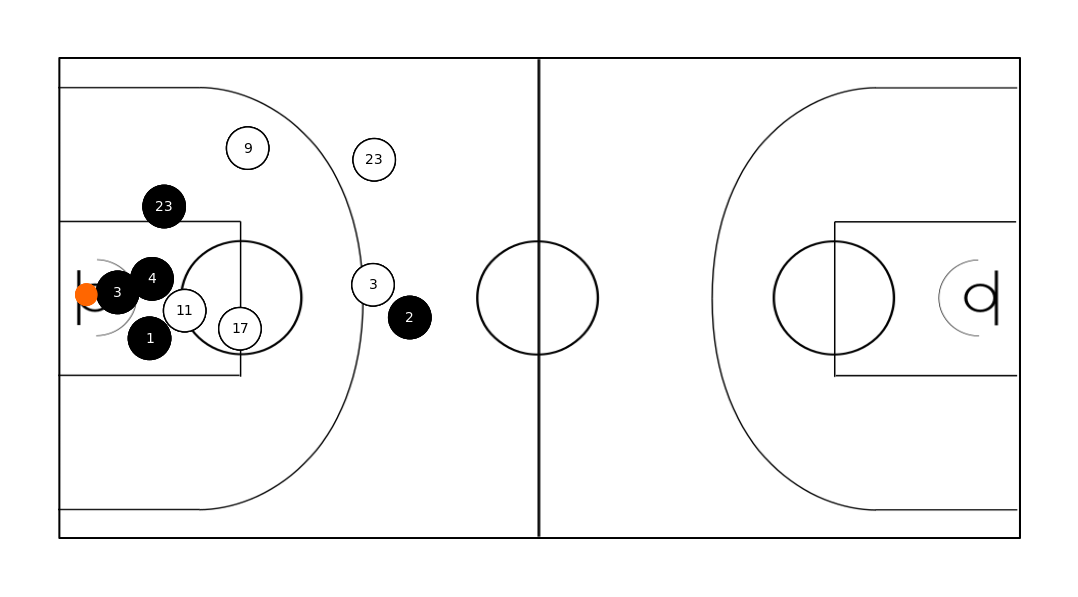

In [16]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(15,7.5)) #create figure object
ax = plt.gca() #create axis object 

draw_court([0,100,0,50]) #draw the court
player_text = list(range(10)) #create player text vector
player_circ = list(range(10)) #create player circle vector
ball_circ = plt.Circle((0,0), 1.1, color=[1, 0.4, 0]) #create circle object for bal
for i in range(10): #create circle object and text object for each player
    col=['w','k'] if i<5 else ['k','w'] #color scheme
    player_circ[i] = plt.Circle((0,0), 2.2, facecolor=col[0],edgecolor='k') #player circle
    player_text[i] = ax.text(0,0,'',color=col[1],ha='center',va='center') #player jersey # (text)

ani = animation.FuncAnimation(fig, animate, frames=np.arange(0,np.size(ball_xy,0)), init_func=init, blit=True, interval=1, repeat=False) #function for making video
ani.save('Event_%d.mp4' % (search_id),dpi=100,fps=25) #function for saving video
plt.show()

plt.close('all') #close the plot


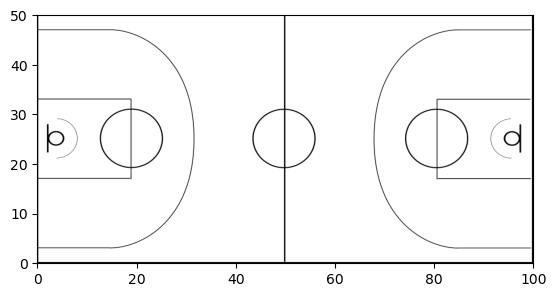

In [17]:
draw_court([0,100,0,50]) #draw the court
